In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap
import matplotlib.pyplot as plt

In [3]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


In [4]:
%pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import shap

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
sns.set(style="whitegrid")

In [8]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [9]:
print("Dataset contains", df.shape[0], "rows and", df.shape[1], "columns.")

Dataset contains 1470 rows and 35 columns.


In [10]:
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInC

In [11]:
print(df.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [12]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

In [13]:
print("Updated columns:\n", df.columns)

Updated columns:
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [14]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [15]:
cat_cols = df.select_dtypes(include='object').columns
print("Categorical columns to encode:\n", cat_cols)

Categorical columns to encode:
 Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')


In [16]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [17]:
print(df[cat_cols].head())

   BusinessTravel  Department  EducationField  Gender  JobRole  MaritalStatus  \
0               2           2               1       0        7              2   
1               1           1               1       1        6              1   
2               2           1               4       1        2              2   
3               1           1               1       0        6              1   
4               2           1               3       1        2              1   

   OverTime  
0         1  
1         0  
2         1  
3         1  
4         0  


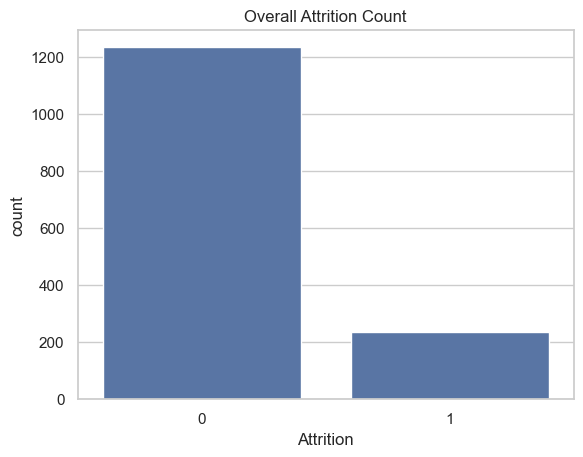

In [18]:
sns.countplot(x='Attrition', data=df)
plt.title("Overall Attrition Count")
plt.show()

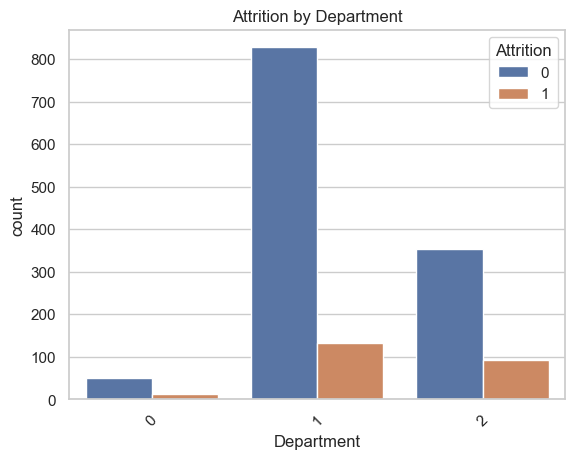

In [19]:
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()

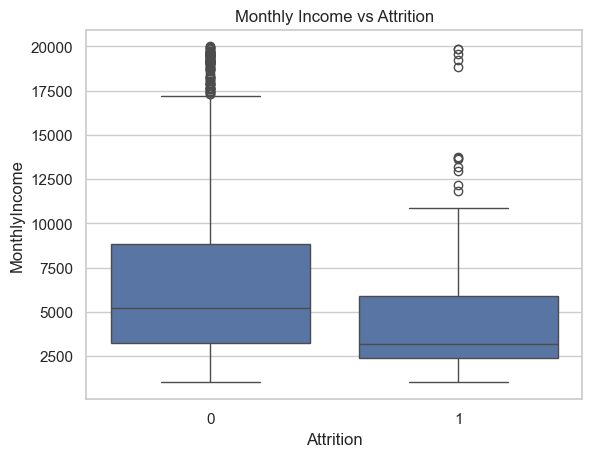

In [20]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")
plt.show()

In [21]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (1176, 30)
Testing data shape: (294, 30)


In [24]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [25]:
y_pred = model.predict(X_test)

In [26]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294



In [27]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.8673469387755102


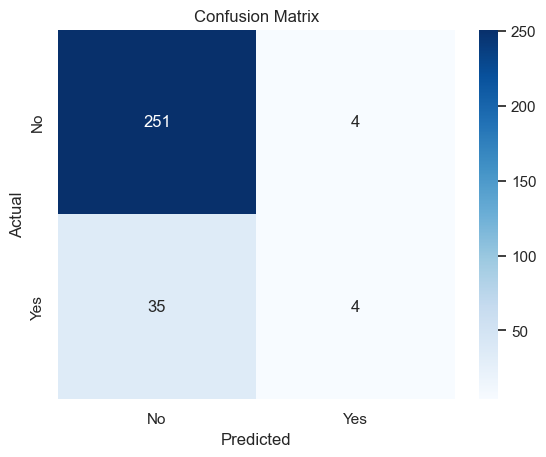

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
explainer = shap.Explainer(model, X_train)

In [30]:
shap_values = explainer(X_test)

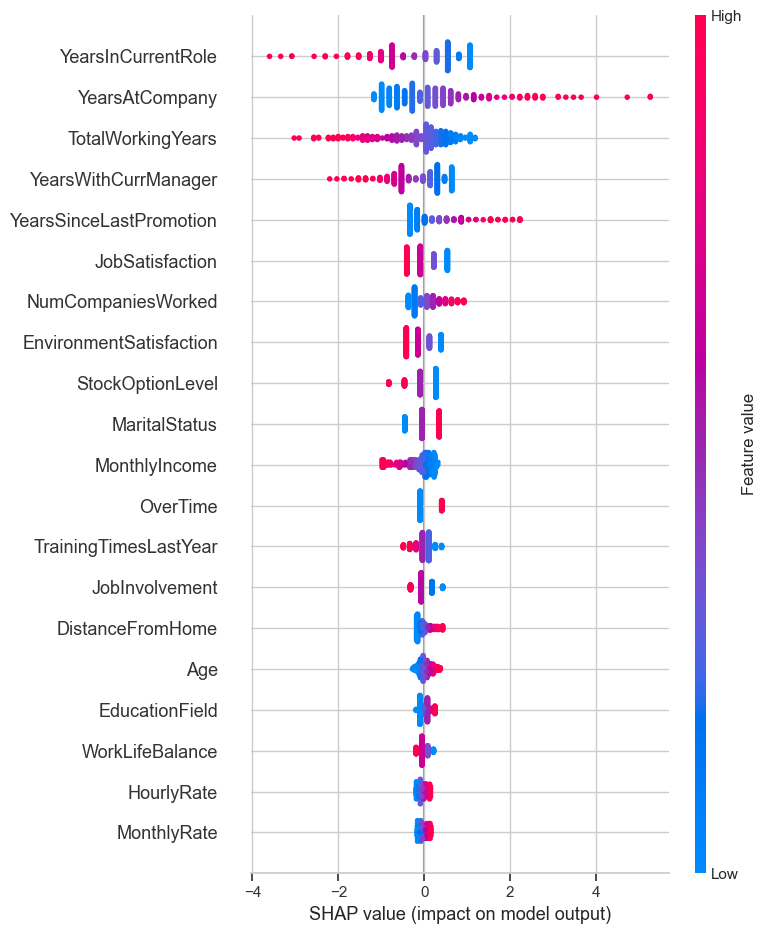

In [31]:
shap.summary_plot(shap_values, X_test)

In [32]:
pip install shap


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [90]:
print("X_test shape:", X_test.shape)  
print("SHAP values shape:", shap_values[1].shape) 


X_test shape: (114, 30)
SHAP values shape: (30, 2)


In [98]:
print("X_test shape:", X_test.shape)
print("shap_values[1] shape:", shap_values[1].shape)


X_test shape: (114, 30)
shap_values[1] shape: (30, 2)


In [100]:
num_features = X_test.shape[1]
shap_feat_count = shap_values[1].shape[1]

if shap_feat_count == num_features:
    shap.summary_plot(shap_values[1], X_test)
elif shap_feat_count == num_features + 1:
    shap.summary_plot(shap_values[1][:, :-1], X_test)
else:
    print(f"Mismatch: X_test features={num_features}, shap values features={shap_feat_count}")


Mismatch: X_test features=30, shap values features=2


In [104]:
pip install --upgrade shap


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [112]:
print("X_test shape:", X_test.shape)
print("shap_values[0] shape:", shap_values[0].shape)
print("shap_values[1] shape:", shap_values[1].shape)


X_test shape: (114, 30)
shap_values[0] shape: (30, 2)
shap_values[1] shape: (30, 2)


X_test shape: (114, 30)
shap_values shape: (114, 30, 2)


<Figure size 640x480 with 0 Axes>

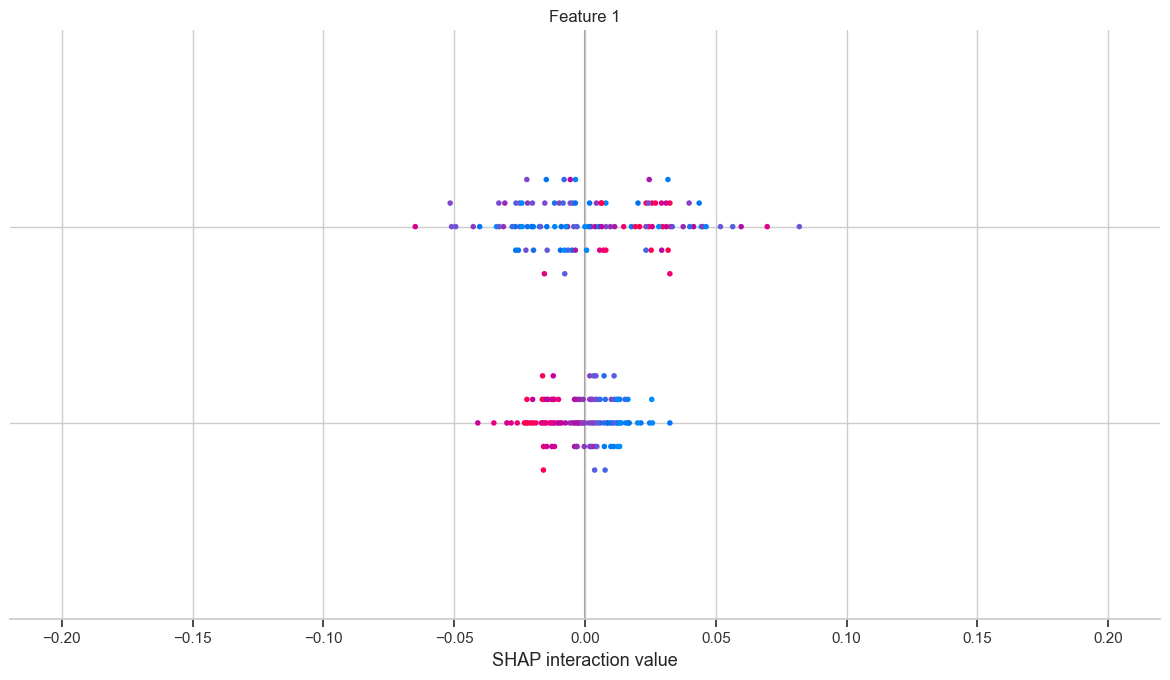

In [120]:
print("X_test shape:", X_test.shape)

if isinstance(shap_values, list):
    for i, sv in enumerate(shap_values):
        print(f"shap_values[{i}] shape:", sv.shape)
    
    # Fix the one you want to plot, e.g., class 1
    sv_to_plot = shap_values[1]
    if sv_to_plot.shape[1] == X_test.shape[1] + 1:
        sv_to_plot = sv_to_plot[:, :-1]
    
    shap.summary_plot(sv_to_plot, X_test)
    
else:
    print("shap_values shape:", shap_values.shape)
    sv_to_plot = shap_values
    if sv_to_plot.shape[1] == X_test.shape[1] + 1:
        sv_to_plot = sv_to_plot[:, :-1]
    
    shap.summary_plot(sv_to_plot, X_test)


In [124]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

print("Random Forest Accuracy:", rf_acc)
print("Gradient Boosting Accuracy:", gb_acc)


Random Forest Accuracy: 0.9649122807017544
Gradient Boosting Accuracy: 0.956140350877193


In [147]:
print(df.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

feature_columns = [
    'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
    'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
    'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
    'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
    'OverTime', 'PercentSalaryHike', 'PerformanceRating',
    'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

X_train_df = df[feature_columns]
feature_names = list(X_train_df.columns)

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  

top_n = min(10, len(feature_names))

top_features = pd.DataFrame({
    'Feature': np.array(feature_names)[indices][:top_n],
    'Importance': importances[indices][:top_n]
})

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title(f"Top {top_n} Important Features")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Step 1: Data Preprocessing
## Step 2: Exploratory Data Analysis (EDA)
## Step 3: Model Building
## Step 4: Model Evaluation
## Step 5: SHAP Explainability
## Step 6: Feature Importance
